In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


train = pd.read_csv('../data/train_users_2.csv')
train['date_account_created'] = pd.to_datetime(train['date_account_created'])
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'])
train['date_first_active'] = pd.to_datetime((train.timestamp_first_active // 1000000), format='%Y%m%d')
train = train[["id", "country_destination", "date_first_active", "date_account_created", "date_first_booking"]]

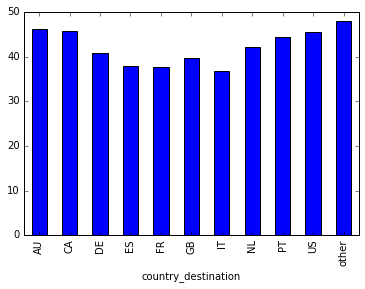

In [10]:
train['active_booking_diff'] = (train.date_first_booking - train.date_first_active).map(lambda x: x.astype('timedelta64[D]')/ np.timedelta64(1, 'D'))
train[~pd.isnull(train['active_booking_diff'])].groupby('country_destination').active_booking_diff.mean().plot(kind='bar')

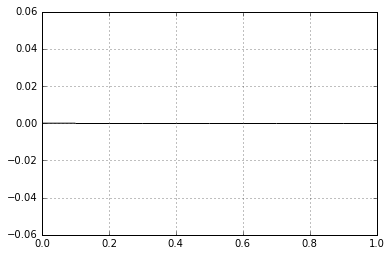

In [15]:
train[train['country_destination'] == 'Other'].active_booking_diff.hist()

In [16]:
import holidays

us_holidays = holidays.UnitedStates()

In [31]:
import pandas as pd
import numpy as np
%matplotlib inline


train = pd.read_csv('../data/sessions.csv')

train.tail(14)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213437,r0jq0devgy,2014-06-30,20140630234243,NaN,-unknown-,NaN,basic,23,en,direct,direct,untracked,Android,Android Tablet,-unknown-,NDF
213438,v5lq9bj8gv,2014-06-30,20140630234429,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213440,04y8115avm,2014-06-30,20140630234933,NaN,FEMALE,24,basic,25,en,direct,direct,untracked,iOS,iPhone,Mobile Safari,NDF
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213442,rf0ay567js,2014-06-30,20140630235309,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,NDF
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US
213444,40o1ivh6cb,2014-06-30,20140630235352,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213445,qbxza0xojf,2014-06-30,20140630235547,2014-07-02,FEMALE,23,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
